In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

geometry_name = '10x10E-PERF'

Load Geometry

In [3]:
with open('./geometry/' + geometry_name + '.bem', 'r') as file:
    lines = file.readlines()
    for line in lines:
        if 'Diameter' in line:
            diameter = float(line.split(':')[1].strip())
            break

geom_data = np.loadtxt('./geometry/' + geometry_name + '.bem', skiprows=11, delimiter=',')    # Load geometry data
R_tip = diameter / 2
r = geom_data[:, 0]
c = geom_data[:, 1]
beta = geom_data[:, 2]

Plot chord and pitch distrubtion

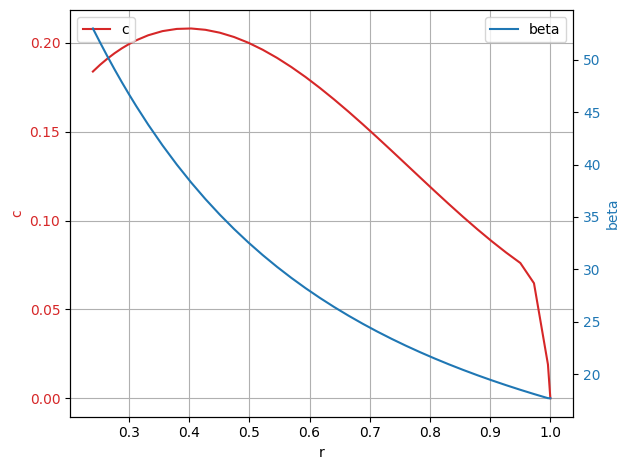

In [4]:
fig, ax1 = plt.subplots()

# Plot c vs r
ax1.plot(r, c, color='tab:red')
ax1.set_xlabel('r')
ax1.set_ylabel('c', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot beta vs r
ax2.plot(r, beta, color='tab:blue')
ax2.set_ylabel('beta', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Add legend
ax1.legend(['c'], loc='upper left')
ax2.legend(['beta'], loc='upper right')

# Make it look good
fig.tight_layout()
ax1.grid()

# Show the plot
plt.show()

Flow Conditions

In [14]:
U_inf = 12 # m/s
rho = 1.225 # kg/m^3
nu = 1.48e-5 # m^2/s
a = 340 # m/s

RPM = 5000 # RPM

J = U_inf / (RPM / 60 * diameter)

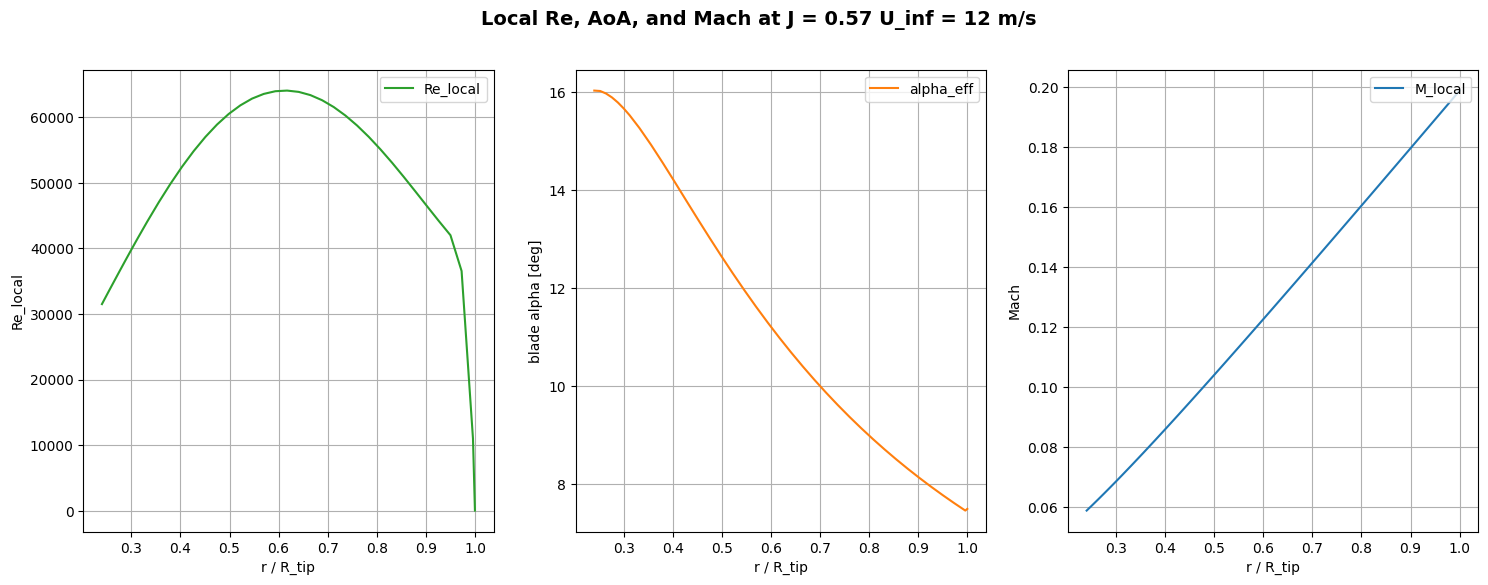

In [15]:
omega = RPM * np.pi / 30
u_r = omega * r * R_tip
u_local = np.sqrt(U_inf**2 + u_r**2)
chord_local = c * R_tip
Re_local = u_local * chord_local / nu
M_local = u_local / a

alpha_eff = beta - np.rad2deg(np.arctan(U_inf / u_r)) 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6)) 

fig.suptitle('Local Re, AoA, and Mach at J = ' + "{:.2f}".format(J) + ' U_inf = ' + str(U_inf) + " m/s", fontsize=14, fontweight='bold')

# Plot r vs Re_local
ax1.plot(r, Re_local, color='tab:green')
ax1.set_xlabel('r / R_tip')
ax1.set_ylabel('Re_local')
ax1.tick_params(axis='y')
ax1.legend(['Re_local'], loc='upper right')
ax1.grid()
# Set y-axis to scientific notation
ax1.ticklabel_format(style='sci', axis='y')

# Plot r vs alpha_eff
ax2.plot(r, alpha_eff, color='tab:orange')
ax2.set_xlabel('r / R_tip')
ax2.set_ylabel('blade alpha [deg]')
ax2.tick_params(axis='y')
ax2.legend(['alpha_eff'], loc='upper right')
ax2.grid()

# Plot r vs M_local
ax3.plot(r, M_local, color='tab:blue')
ax3.set_xlabel('r / R_tip')
ax3.set_ylabel('Mach')
ax3.tick_params(axis='y')
ax3.legend(['M_local'], loc='upper right')
ax3.grid()

# Show the plot
plt.show()